# <center><font color=purple> Project: Analysis Spotify Track</font>  <center>

author: Kitithat khemsom

### Import Libaries

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("NumPy", np.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print("Imbalanced-Learn", imblearn.__version__)
import pandas as pd; print("Pandas", pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns;print("seaborn", sns.__version__)
%matplotlib inline

Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy 1.19.4
SciPy 1.4.1
Scikit-Learn 0.22.2.post1
Imbalanced-Learn 0.4.3
Pandas 1.1.5
seaborn 0.11.0


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# <center> Phase 1: Data Collection - Spotify Data Set </center>
**Data Set Characteristics:**

Number of Instances:  26400 

Number of Attributes:  17 attributes

Missing Attribute Values:  None

**Creator:**  Kitithat & Chanon

**Date:**  April, 2020

**Description:**

The data contains the hit songs on the charts collected from August 2017 March 2020 in Thailand. There are thirteen different measurements taken for different constituents found in the tracks.

**Audio Features:**
<div id = "table">
<table style="width:1000px">
    <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 75%;">
    </colgroup>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>duration_ms</td>
      <td>int</td>
      <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
      <td>key</td>
      <td>int</td>
      <td>The estimated overall key of the track. Integers map to pitches using standard <a href="https://en.wikipedia.org/wiki/Pitch_class" target="_blank" class=" externalLink">Pitch Class notation</a> . <br>E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>int</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. <br>Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>int</td>
      <td>An estimated overall time signature of a track. <br>The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
    <tr>
      <td>acousticness</td>
      <td>float</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. <br>1.0 represents high confidence the track is acoustic.</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>float</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements <br>including tempo, rhythm stability, beat strength, and overall regularity. <br>A value of 0.0 is least danceable and 1.0 is most danceable.</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>float</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <br>Typically, energetic tracks feel fast, loud, and noisy. <br>For example, death metal has high energy, while a Bach prelude scores low on the scale. <br>Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>float</td>
      <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. <br>Rap or spoken word tracks are clearly “vocal”. <br>The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. <br>Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>float</td>
      <td>Detects the presence of an audience in the recording. <br>Higher liveness values represent an increased probability that the track was performed live. <br>A value above 0.8 provides strong likelihood that the track is live.</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>float</td>
      <td>The overall loudness of a track in decibels (dB). <br>Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. <br>Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). <br>Values typical range between -60 and 0 db.</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>float</td>
      <td>Speechiness detects the presence of spoken words in a track. <br>The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. <br>Values above 0.66 describe tracks that are probably made entirely of spoken words. <br>Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, <br>including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>float</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. <br>Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), <br>while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>float</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). <br>In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The Spotify ID for the track.</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The Spotify URI for the track.</td>
    </tr>
    <tr>
      <td>track_href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>analysis_url</td>
      <td>string</td>
      <td>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “audio_features”</td>
    </tr>
  </tbody>
</table>
</div>




## Get Chart Data

get chart data from Spotify via [Spotify Charts](https://spotifycharts.com/regional/th/weekly/latest "Top 200 weekly charts")
<br/>
<br/>

---
(Credit : https://github.com/fbkarsdorp/spotify-chart)

In [2]:
  import io
  import requests
  import time
  import tqdm

In [3]:
class charts:
  def week_dates(self, date, weekday=0):
      week_start = date - pd.DateOffset(weekday=weekday, weeks=1)
      week_end = date + pd.DateOffset(weekday=weekday, weeks=0)
      return week_start, week_end


  def get_chart(self, date, region='en', freq='daily', chart='top200'):
      chart = 'regional' if chart == 'top200' else 'viral'
      date = pd.to_datetime(date)
      if date.year < 2017:
          raise ValueError('No chart data available from before 2017')
      if freq == 'weekly':
          start, end = self.week_dates(date, weekday=4)
          date = f'{start.date()}--{end.date()}'
      else:
          date = f'{date.date()}'
      url = f'https://spotifycharts.com/{chart}/{region}/{freq}/{date}/download'
      data = io.StringIO(requests.get(url).text)
      try:
          df = pd.read_csv(data, skiprows=1) # Fix Spotify's Note
      except pd.errors.ParserError:
          df = None
          print(data)
      return df


  def get_charts(self, start, end, region='en', freq='daily', chart='top200', sleep=1):
      sample = 'D' if freq == 'daily' else 'W'
      dfs = []
      for date in tqdm.tqdm(pd.date_range(start=start, end=end, freq=sample)):
          df = self.get_chart(date, region=region, freq=freq, chart=chart)
          if df is not None:
              df['date'] = date
              dfs.append(df)
              time.sleep(sleep)
      return pd.concat(dfs)

In [4]:
charts = charts()

In [5]:
'''
Taking too long to run
df_charts = charts.get_charts('2019-01-01', '2020-11-01', region = 'th', freq = 'weekly')
df_charts.reset_index(inplace = True)
'''

df_charts = pd.read_csv('https://github.com/touchaee/Spotify-Hot-Track-Prediction/raw/main/2019-2020.csv')

In [6]:
df_charts.head()

,Unnamed: 0,index,Position,Track Name,Artist,Streams,URL,date
0,0,0,1,SOLO,JENNIE,176738,https://open.spotify.com/track/2wVDWtLKXunswWe...,2019-01-06
1,1,1,2,ลาลาลอย (100%),The Toys,171689,https://open.spotify.com/track/3f3L2MP4oniV1bm...,2019-01-06
2,2,2,3,ซ่อนกลิ่น,Palmy,166046,https://open.spotify.com/track/7woh2lJvyILYxSQ...,2019-01-06
3,3,3,4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,148416,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019-01-06
4,4,4,5,"thank u, next",Ariana Grande,145598,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-06


In [7]:
df_charts.to_csv('2019-2020.csv')

## Get Audio Features
Get audio feature information for a single track identified by its unique Spotify ID  
via [Spotify Web API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ "Documentation")
<br/>
<br/>

In [8]:
!pip install -q spotipy

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [10]:
client_id = '8c62db96fcdb4f8d9f82454597040341'
client_secret = '3f87891bb30b4f40a0a7bc2dfa7d1c4c'

In [11]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [12]:
df_charts['track_id'] = df_charts.URL.str.extract(r'.*/track/(.*)')

In [13]:
track_ids = df_charts.track_id.to_list()

In [14]:
'''
index = 0
audio_features = []
while index < len(track_ids):
    audio_features += sp.audio_features(track_ids[index])
    index += 1
'''

'\nindex = 0\naudio_features = []\nwhile index < len(track_ids):\n    audio_features += sp.audio_features(track_ids[index])\n    index += 1\n'

In [15]:
'''
features_list = []
for features in audio_features:
    features_list.append([features['energy'], features['liveness'],
                        features['tempo'], features['speechiness'],
                        features['acousticness'], features['instrumentalness'],
                        features['time_signature'], features['danceability'],
                        features['key'], features['duration_ms'],
                        features['loudness'], features['valence'],
                        features['mode'], features['type'],
                        features['uri']])
'''

"\nfeatures_list = []\nfor features in audio_features:\n    features_list.append([features['energy'], features['liveness'],\n                        features['tempo'], features['speechiness'],\n                        features['acousticness'], features['instrumentalness'],\n                        features['time_signature'], features['danceability'],\n                        features['key'], features['duration_ms'],\n                        features['loudness'], features['valence'],\n                        features['mode'], features['type'],\n                        features['uri']])\n"

In [16]:
'''
df_features = pd.DataFrame(features_list, columns=['energy', 'liveness',
                                              'tempo', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'time_signature', 'danceability',
                                              'key', 'duration_ms', 'loudness',
                                              'valence', 'mode', 'type', 'uri'])
'''

"\ndf_features = pd.DataFrame(features_list, columns=['energy', 'liveness',\n                                              'tempo', 'speechiness',\n                                              'acousticness', 'instrumentalness',\n                                              'time_signature', 'danceability',\n                                              'key', 'duration_ms', 'loudness',\n                                              'valence', 'mode', 'type', 'uri'])\n"

In [17]:
df_features = pd.read_csv('https://github.com/touchaee/Spotify-Hot-Track-Prediction/raw/main/2019-2020-features.csv')
df_features.head()

,Unnamed: 0,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,0,0.642,0.0953,95.045,0.0870,0.0861,0.000000,4,0.751,3,169567,-5.165,0.388,0,audio_features,spotify:track:2wVDWtLKXunswWecARNILj
1,1,0.738,0.1110,85.009,0.0327,0.2520,0.046500,4,0.685,2,184000,-8.211,0.784,1,audio_features,spotify:track:3f3L2MP4oniV1bmSxGbcW4
2,2,0.714,0.0990,90.991,0.0274,0.0427,0.000306,4,0.489,0,251947,-5.771,0.284,1,audio_features,spotify:track:7woh2lJvyILYxSQ1kXTI3d
3,3,0.479,0.0703,89.911,0.0466,0.5560,0.000000,4,0.760,2,158040,-5.574,0.913,1,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P
4,4,0.647,0.1020,106.960,0.0658,0.2800,0.000000,4,0.724,1,207333,-5.642,0.435,1,audio_features,spotify:track:2rPE9A1vEgShuZxxzR2tZH


In [18]:
df_features.to_csv("2019-2020-features.csv")

## Merge 2 Dataframe

In [19]:
df_concat = pd.concat([df_charts, df_features], axis = 1)

In [20]:
df = df_concat.drop(['index', 'URL', 'type', 'uri', 'track_id'], axis = 1)

In [21]:
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,date,Unnamed: 0,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,0,1,SOLO,JENNIE,176738,2019-01-06,0,0.642,0.0953,95.045,0.0870,0.0861,0.000000,4,0.751,3,169567,-5.165,0.388,0
1,1,2,ลาลาลอย (100%),The Toys,171689,2019-01-06,1,0.738,0.1110,85.009,0.0327,0.2520,0.046500,4,0.685,2,184000,-8.211,0.784,1
2,2,3,ซ่อนกลิ่น,Palmy,166046,2019-01-06,2,0.714,0.0990,90.991,0.0274,0.0427,0.000306,4,0.489,0,251947,-5.771,0.284,1
3,3,4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,148416,2019-01-06,3,0.479,0.0703,89.911,0.0466,0.5560,0.000000,4,0.760,2,158040,-5.574,0.913,1
4,4,5,"thank u, next",Ariana Grande,145598,2019-01-06,4,0.647,0.1020,106.960,0.0658,0.2800,0.000000,4,0.724,1,207333,-5.642,0.435,1


In [22]:
df.to_csv("2019-2020 track with feature.csv")

---

---

---

## Get Data
get data from csv file because the data collection process take too long.

In [23]:
df = pd.read_csv('https://github.com/touchaee/Spotify-Hot-Track-Prediction/raw/main/2019-2020%20track%20with%20feature.csv', parse_dates = [5])
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,Position,Track Name,Artist,Streams,date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,1,SOLO,JENNIE,176738,2019-01-06,0.642,0.0953,95.045,0.0870,0.0861,0.000000,4,0.751,3,169567,-5.165,0.388,0
1,2,ลาลาลอย (100%),The Toys,171689,2019-01-06,0.738,0.1110,85.009,0.0327,0.2520,0.046500,4,0.685,2,184000,-8.211,0.784,1
2,3,ซ่อนกลิ่น,Palmy,166046,2019-01-06,0.714,0.0990,90.991,0.0274,0.0427,0.000306,4,0.489,0,251947,-5.771,0.284,1
3,4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,148416,2019-01-06,0.479,0.0703,89.911,0.0466,0.5560,0.000000,4,0.760,2,158040,-5.574,0.913,1
4,5,"thank u, next",Ariana Grande,145598,2019-01-06,0.647,0.1020,106.960,0.0658,0.2800,0.000000,4,0.724,1,207333,-5.642,0.435,1


In [24]:
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from ipywidgets import interact
import math

In [25]:
#set color palette to pastel
sns.set_palette('pastel')

# <center>Phase 2: Data Understanding - Explore Data </center>
Analyze each of the features in dataframe

Import Libaries

## Top Artist in Thailand 

In [26]:
def print_top_n(series, n = 10, text = 'artist'):
  a = 1
  streams = 'streams'
  for i, v in series.iteritems():
    if a <= n:
      print(f'{a:>2}. {text} : {i:<50} {streams:>10} : {v:,} ({(v/series.sum()*100):.2f}%)')
      a += 1
    else:
      pass
  print(f'Total Streams : {series.sum():,}')

In [27]:
top_artist = df.groupby('Artist')['Streams'].sum().sort_values(ascending = False)
print_top_n(top_artist, n = 10, text = 'artist')

 1. artist : BLACKPINK                                             streams : 50,056,752 (2.98%)
 2. artist : Wanyai                                                streams : 46,187,061 (2.75%)
 3. artist : Polycat                                               streams : 45,599,549 (2.72%)
 4. artist : Three Man Down                                        streams : 43,669,114 (2.60%)
 5. artist : MEAN                                                  streams : 37,787,739 (2.25%)
 6. artist : BTS                                                   streams : 34,678,065 (2.07%)
 7. artist : BOWKYLION                                             streams : 33,085,417 (1.97%)
 8. artist : Lauv                                                  streams : 31,679,187 (1.89%)
 9. artist : Zommarie                                              streams : 30,770,612 (1.83%)
10. artist : SCRUBB                                                streams : 30,347,929 (1.81%)
Total Streams : 1,678,133,084


## Top Tracks in Thailand

In [28]:
top_track = df.groupby('Track Name')['Streams'].sum().sort_values(ascending = False)
print_top_n(top_track, n = 10, text = 'track')

 1. track : ฝนตกไหม                                               streams : 19,278,702 (1.15%)
 2. track : ภาวนา                                                 streams : 17,905,788 (1.07%)
 3. track : คิด(แต่ไม่)ถึง (Same Page?)                           streams : 17,131,287 (1.02%)
 4. track : ลงใจ                                                  streams : 15,274,738 (0.91%)
 5. track : นิโคติน                                               streams : 15,157,530 (0.90%)
 6. track : ถ้าฉันเป็นเขา                                         streams : 15,156,207 (0.90%)
 7. track : เจ็บจนพอ                                              streams : 15,130,947 (0.90%)
 8. track : แอบดี (How to live without you)                       streams : 13,508,995 (0.81%)
 9. track : รางวัลปลอบใจ                                          streams : 13,267,254 (0.79%)
10. track : พอเถอะ                                                streams : 13,195,948 (0.79%)
Total Streams : 1,678,133,084


## Date collection & Total Streams Growth

In [29]:
df_date = df.groupby('date')['Streams'].sum()

In [30]:
print('Data collected')
print(f"{df_date.index[0]:%B %e, %Y} to {df_date.index[-1]:%B %e, %Y}")

Data collected
January  6, 2019 to November  1, 2020


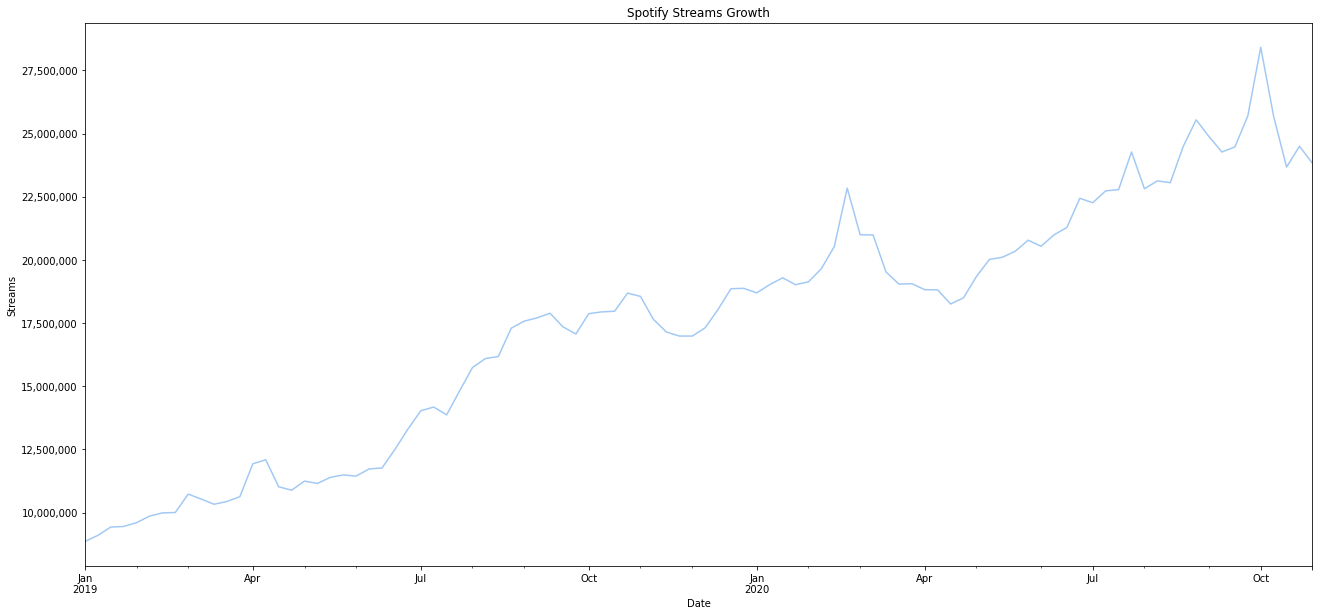

In [31]:
plt.figure(figsize=(22, 10))
ax = df_date.plot()
plt.title('Spotify Streams Growth')  
plt.xlabel('Date')  
plt.ylabel('Streams')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Corelation between column

In [32]:
df_analyze = df.drop_duplicates(subset = ['Track Name']).drop(['Position', 'Track Name', 'Artist', 'Streams', 'date'], axis = 1)

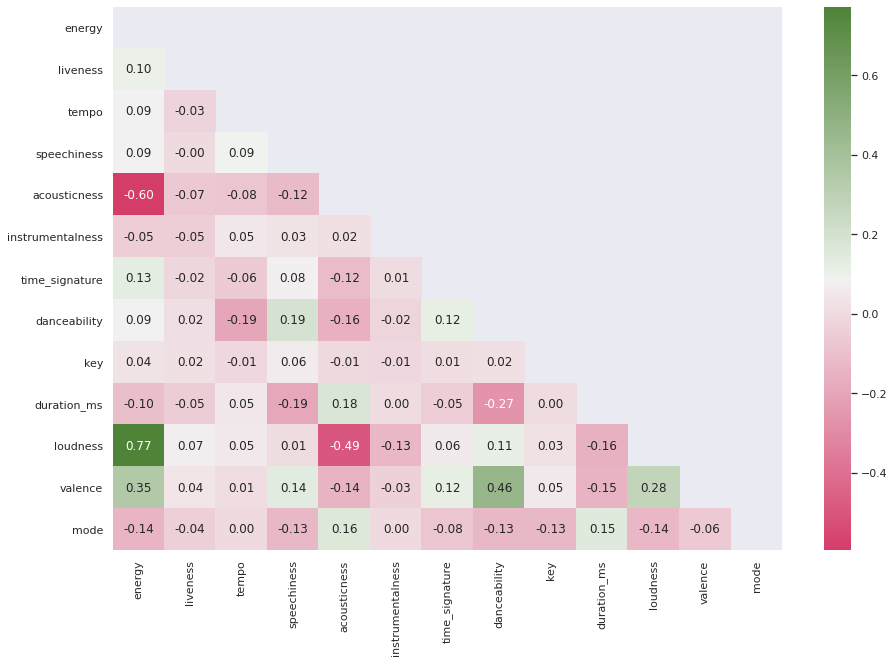

In [33]:
mask = np.zeros_like(df_analyze.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(h_neg = 0, h_pos = 120, as_cmap= True)
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_analyze.corr(),cmap=cmap, annot = True, fmt = '.2f', mask = mask)

**ANALYSIS**:
- loudness and  energy :  0.75
- acousticness and energy : -0.57
- acousticness and loudness :-0.47

these 3  correlations are interesting so we decided to investigate further with these columns (**energy, loudness, acousticness**) 

## ANALYZE ALL COLUMN

In [34]:
def analyze_col(col):
  mean = df_analyze[col].mean()
  plt.figure(figsize = (7,5))
  sns.distplot(df_analyze[col])
  plt.title(f'{col} Distribution')
  plt.show()
  print(f'Mean value of {col} is {mean:.2f}')

### Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
Typically, energetic tracks feel fast, loud, and noisy.
For example, death metal has high energy, while a Bach prelude scores low on the scale.
Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


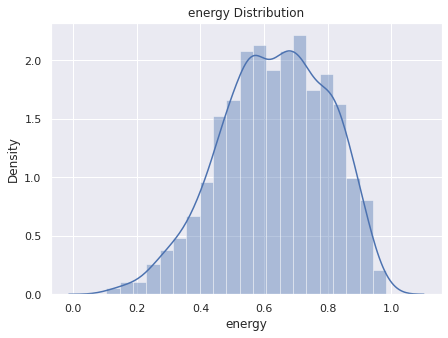

Mean value of energy is 0.63


In [35]:
analyze_col('energy')

เพลงส่วนใหญ่ในไทยค่อนข้างมี energy ที่สูง หรือกล่าวคือเป็นเพลงเร็ว เสียงดังเเละหนวกหู มีเสียงกลองเเละเสียงกีตาร์ไฟฟ้า ประกอบอยู่ในเพลงด้วย

### Liveness
Detects the presence of an audience in the recording.
Higher liveness values represent an increased probability that the track was performed live.
A value above 0.8 provides strong likelihood that the track is live.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


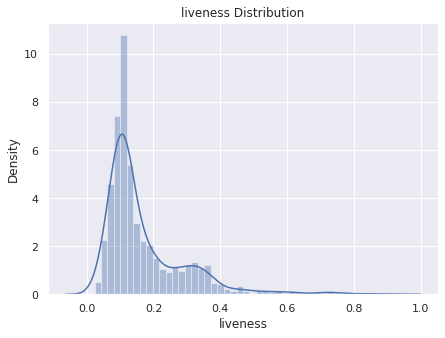

Mean value of liveness is 0.17


In [36]:
analyze_col('liveness')

โดยการวัด liveness วัดจากเสียงผู้ชมที่มีอยู่ในเพลง จากกราฟ สามารถตีความได้ว่า เพลงส่วนใหญ่ที่คนไทยฟัง เป็นเพลงที่ไม่ได้ถูกอัดผ่านการเเสดงสด เเต่เป็นเพลงที่ถูกบันทึกจาก studio โดยตรง 

### Tempo
The overall estimated tempo of a track in beats per minute (BPM).
In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



|Tempo Marking | Beats per Minute |
| --- | :---: |
|Grave | 40-50 BPM |
|Largo | 50-55 BPM |
|Larghetto | 55-60 BPM |
|Adagio | 60-70 BPM |
|Andante | 70-85 BPM |
|Moderato| 85-100 BPM |
|Allegretto|100-115 BPM |
|Allegro|115-140 BPM |
|Vivace|140-150 BPM |
|Presto|150-170 BPM |
|Prestissimo | 170+ BPM |

The distribution of values for this feature look like this:

In [37]:
labels = ['Grave', 'Largo', 'Larghetto', 'Adagio', 'Andante', 'Moderato', 'Allegretto', 'Allegro', 'Vivance', 'Presto', 'Prestissimo']
bins = [40, 50, 55, 60, 70, 85, 100, 115, 140, 150, 170, np.inf]
df_analyze['tempo_marking'] = pd.cut(df_analyze.tempo, bins=bins, labels=labels)

In [38]:
df_analyze.tempo_marking.value_counts()

Allegro        358
Allegretto     273
Moderato       261
Andante        139
Vivance        138
Presto         127
Prestissimo     91
Adagio           5
Larghetto        0
Largo            0
Grave            0
Name: tempo_marking, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


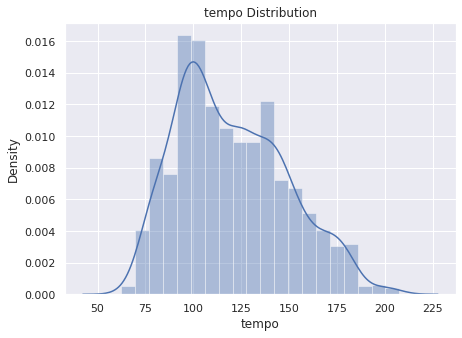

Mean value of tempo is 120.15


In [39]:
analyze_col('tempo')

เพลงที่คนไทยฟังส่วนใหญ่นั้น เป็นเพลงที่ถูกอยู่ใน Tempo ประเภท Allegro, Moderato เเละ Allegretto

### Speechiness
Speechiness detects the presence of spoken words in a track.
The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
Values above 0.66 describe tracks that are probably made entirely of spoken words.
Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered,
including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


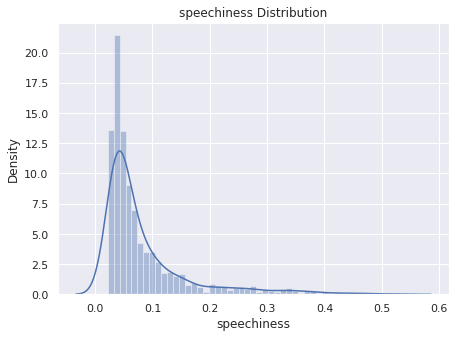

Mean value of speechiness is 0.08


In [40]:
analyze_col('speechiness')

เพลงส่วนใหญ่ที่คนไทยฟังในช่วงปี 2017 - 2020 เป็นเพลงที่มีคำร้องไม่มาก กล่าวคือ เป็นเพลงที่ไม่ใช่จำพวก rap โดยเน้นจังหวะของดนตรีเป็นสำคัญ สังเกตได้จากกราฟ เเละค่า mean ที่เกิดขึ้น

### Acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
1.0 represents high confidence the track is acoustic.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


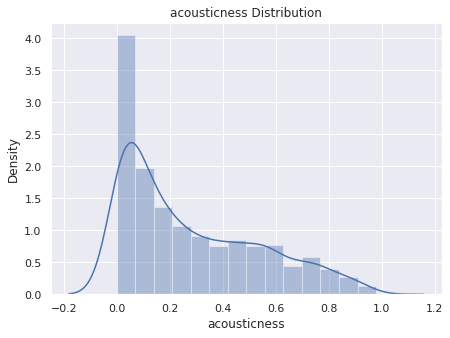

Mean value of acousticness is 0.28


In [41]:
analyze_col('acousticness')

จากกราฟ เเละค่า mean ของค่า Accousticness ของเพลงที่คนไทยส่วนใหญ่ฟังนั้น เป็นเพลงที่ไม่ค่อยมีความ acoustic หรือ ไม่ใช่เพลงที่มีกีตาร์โปร่ง นำเพลง ซึ่งอาจตีความได้ว่า ในช่วงปี 2017-2020 เพลงที่คนไทยส่วนใหญ่ฟัง ไม่นิยมใช้กีตาร์โปร่งนำ เเต่อาศัยเครื่องดนตรีประเภทอื่นใน การนำเพลง

### Instrumentalness
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.
Rap or spoken word tracks are clearly “vocal”.
The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


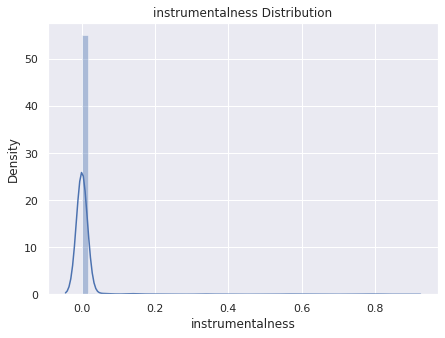

Mean value of instrumentalness is 0.01


In [42]:
analyze_col('instrumentalness')

เพลงไทยส่วนใหญ่ เป็นคำร้องที่มีความหมายชัดเจน ไม่ออกเสียงร้องที่ไม่มีความหมาย เช่นการออกเสียงให้เข้ากับจังหวะของเพลง เเละ เพลงส่วนใหญ่ที่คนไทยฟังไม่ใช่เพลงทีมีเเต่เครื่องดนตรี(ไม่มีคำร้องอยู่ในเพลง) อาจตีความได้ว่า ในปี 2017 - 2020 เพลงที่คนไทยไม่นิยมฟัง คือเพลงจำพวกเพลงบรรเลง เเต่จะนิยมฟังเพลง ที่เน้นสื่อความหมายจากคำร้องเป็นสำคัญ

### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements
including tempo, rhythm stability, beat strength, and overall regularity.
A value of 0.0 is least danceable and 1.0 is most danceable.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


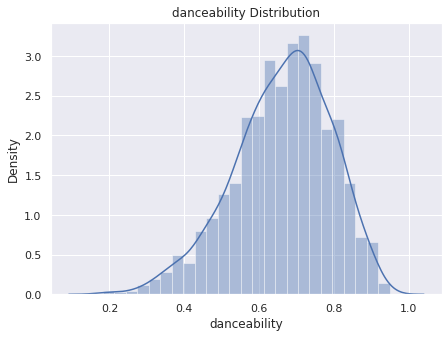

Mean value of danceability is 0.66


In [43]:
analyze_col('danceability')

ค่า Danceability ของเพลงที่คนไทยส่วนใหญ่ฟังนั้นเป็นเพลงที่มีค่า Danceability ค่อนข้างสูง กล่าวคือ มีการเน้นจังหวะ เเละความหนักเเน่นของ beat เน้นความสนุกของเพลงเป็นหลัก สังเกตได้จากค่า mean ที่ค่อนข้างสูง 0.65

### Key
The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation .
E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


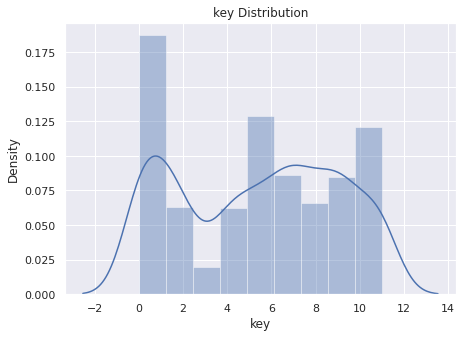

Mean value of key is 5.38


In [44]:
analyze_col('key')

Key ที่เจอในเพลงที่คนไทยส่วนใหญ่ฟังคือ C,  C♯/D♭

### Duration
The duration of the track in milliseconds

In [45]:
df_analyze['duration_min']=df_analyze['duration_ms']/(60*1000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


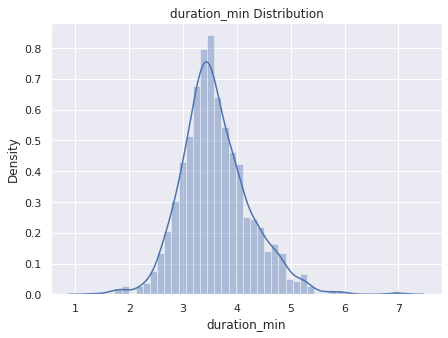

Mean value of duration_min is 3.60


In [46]:
analyze_col('duration_min')

เพลงส่วนใหญ่ที่่คนไทยฟังเป็นเพลงที่ความยาวอยู่ในช่วง 3 - 4 นาที

### Loudness
The overall loudness of a track in decibels (dB).
Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
Values typical range between -60 and 0 db.
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


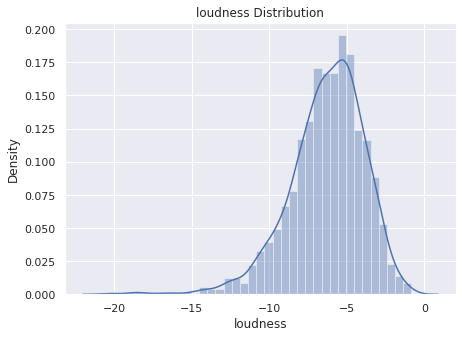

Mean value of loudness is -6.29


In [47]:
analyze_col('loudness')

วิธีการ interpret กราฟ loudness 
- ถ้าค่า loudness ในกราฟติดลบน้อยเเสดงว่า เพลงนั้นมีค่า loudness(Decibels) ที่มาก

เมื่อพิจารณากราฟจะเห็นได้ว่า เพลงส่วนใหญ่ที่คนไทยฟัง อยู่ในช่วงที่มีค่า loudness ติดลบค่อนข้างน้อย เเสดงให้เห็นว่า คนไทยฟังเพลงที่มีค่าเฉลี่ยความดัง(หน่วย Decibels ไม่ใช่ perceptual loudness) ค่อนข้างสูง สังเกตได้จากค่า mean ที่ -6.18

[Loudness Explanation](https://ask.audio/articles/spotify-drops-loudness-target-to-14-lufs-what-does-this-mean-for-producers)

### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric),
while tracks with low valence sound more negative (e.g. sad, depressed, angry).
The distribution of values for this feature look like this:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


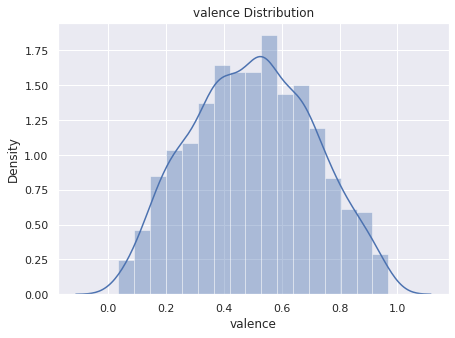

Mean value of valence is 0.50


In [48]:
analyze_col('valence')

วิธีการ interpret ค่า valence ในกราฟ
- ค่าสูง เเปลว่า เพลงนั้นเป็นเพลงที่ให้ความรู้สึก positive
- ค่าต้ำ เเปลว่า เพลงนั้นเป็นเพลงที่ให้ความรู้สึก negative

เมื่อพิจารณากราฟจะเห็นว่า เพลงที่คนไทยชอบฟังนั้น ไม่มีลักษณะที่ชัดเจนว่าต้องเป็นเพลงที่ให้ positive feeling หรือ negative feeling อย่างใดอย่างหนึ่งเท่านั้น เเต่ฟังสลับกันไปตามอารมณ์ของผู้ฟัง

### Mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
Major is represented by 1 and minor is 0.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


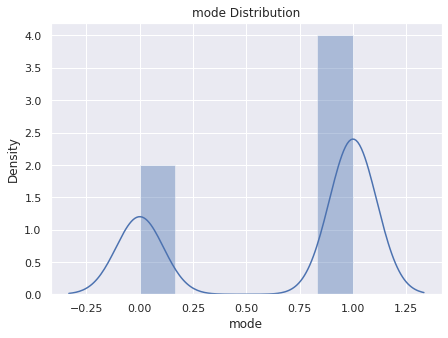

Mean value of mode is 0.67


In [49]:
analyze_col('mode')

เพลงที่คนไทยส่วนใหญ่ฟัง เป็นเพลงที่เล่นอยู่ใน Major Scale มากกว่า Minor Scale

# Phase 3 : Modeling

In [50]:
df.head()

,Position,Track Name,Artist,Streams,date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,1,SOLO,JENNIE,176738,2019-01-06,0.642,0.0953,95.045,0.0870,0.0861,0.000000,4,0.751,3,169567,-5.165,0.388,0
1,2,ลาลาลอย (100%),The Toys,171689,2019-01-06,0.738,0.1110,85.009,0.0327,0.2520,0.046500,4,0.685,2,184000,-8.211,0.784,1
2,3,ซ่อนกลิ่น,Palmy,166046,2019-01-06,0.714,0.0990,90.991,0.0274,0.0427,0.000306,4,0.489,0,251947,-5.771,0.284,1
3,4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,148416,2019-01-06,0.479,0.0703,89.911,0.0466,0.5560,0.000000,4,0.760,2,158040,-5.574,0.913,1
4,5,"thank u, next",Ariana Grande,145598,2019-01-06,0.647,0.1020,106.960,0.0658,0.2800,0.000000,4,0.724,1,207333,-5.642,0.435,1


In [51]:
df_model = df.sort_values(['Track Name', 'Position']).drop_duplicates(subset = ['Track Name']).reset_index(drop = True)

In [52]:
df_model['target'] = df_model.Position.apply(lambda x: 1 if x <= 30 else 0)

In [53]:
df_model.head()

,Position,Track Name,Artist,Streams,date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,target
0,21,00:00 (Zero O’Clock),BTS,239992,2020-02-23,0.548,0.1100,157.999,0.0579,0.0802,0.00000,4,0.566,1,250296,-6.456,0.196,1,1
1,91,1 Billion Views,EXO-SC,79617,2020-07-19,0.727,0.0997,111.928,0.0364,0.3620,0.00000,4,0.735,0,209253,-2.837,0.612,0,0
2,10,1%,Stamp,286551,2020-02-16,0.571,0.1170,116.089,0.0350,0.5770,0.00003,4,0.628,8,270138,-7.570,0.523,1,1
3,11,"10,000 Hours (with Justin Bieber)",Dan + Shay,206010,2019-10-13,0.630,0.1110,89.991,0.0259,0.1530,0.00000,4,0.654,10,167693,-4.644,0.430,1,1
4,179,100,SuperM,56959,2020-08-16,0.859,0.3630,114.993,0.0461,0.0277,0.00000,4,0.692,7,206720,-2.529,0.403,1,0


In [54]:
df_model.drop(['Track Name','Position','Artist','Streams','date'], axis = 1, inplace= True)

## Phase 3.1 : Data Prepration

### Check Balanced of data Set

In [55]:
df_model.target.value_counts()

0    1106
1     286
Name: target, dtype: int64

In [56]:
df_model.target.value_counts()/df_model.shape[0]

0    0.79454
1    0.20546
Name: target, dtype: float64

In [57]:
outcomename = 'target'

y = df_model[outcomename]
X = df_model.drop(outcomename, axis = 1)

featurename = X.columns
outcome_value = ["0","1"]

### over sampling

In [58]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [59]:
X = pd.DataFrame(X_resampled, columns = featurename)
y = pd.Series(y_resampled)

In [60]:
X.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,0.548,0.1100,157.999,0.0579,0.0802,0.00000,4.0,0.566,1.0,250296.0,-6.456,0.196,1.0
1,0.727,0.0997,111.928,0.0364,0.3620,0.00000,4.0,0.735,0.0,209253.0,-2.837,0.612,0.0
2,0.571,0.1170,116.089,0.0350,0.5770,0.00003,4.0,0.628,8.0,270138.0,-7.570,0.523,1.0
3,0.630,0.1110,89.991,0.0259,0.1530,0.00000,4.0,0.654,10.0,167693.0,-4.644,0.430,1.0
4,0.859,0.3630,114.993,0.0461,0.0277,0.00000,4.0,0.692,7.0,206720.0,-2.529,0.403,1.0


In [61]:
y.value_counts()

1    1106
0    1106
dtype: int64

### Split training data and  test data 

In [62]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 1234,stratify = y)
print('training set = {} records, test set= {} records'.format(X_train.shape[0],X_test.shape[0]))

training set = 1769 records, test set= 443 records


### StandardScaler (Z-score)


In [63]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)  
X_test_scal = scaler.transform(X_test)

X_train_scal = pd.DataFrame(data=X_train_scal, index=X_train.index, columns=X_train.columns)
X_test_scal = pd.DataFrame(data=X_test_scal, index=X_test.index, columns=X_test.columns)

## Phase 3.2 : Model

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, precision_score, recall_score

In [66]:
def cm_plot(cm):
    plt.clf()
    plt.figure(figsize=(15,7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
    classNames = ['TOP 30','Not TOP 30']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FN'], ['FP', 'TN']]
    plt.grid(None)
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["font.weight"] = "bold"
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

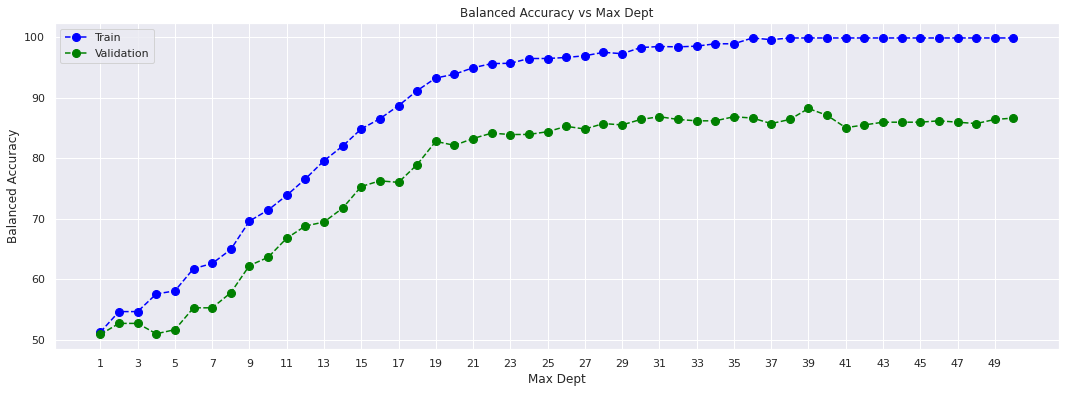

At 38 Dept : Balanced Accuracy is 88.23529411764706%


In [67]:
acc_train = []
acc_test = []
dept_start = 1
dept_end = 50

for i in range(dept_start, dept_end+1):
  DTree_Clf = DecisionTreeClassifier(criterion="entropy", max_depth= i) 
  DTree_Clf = DTree_Clf.fit(X_train, y_train)
  y_pred_test = DTree_Clf.predict(X_test)
  y_pred_train = DTree_Clf.predict(X_train)
  acc_train.append(balanced_accuracy_score(y_train,y_pred_train)*100)
  acc_test.append(balanced_accuracy_score(y_test,y_pred_test)*100)

plt.figure(figsize=(18, 6))
plt.plot(range(dept_start, dept_end+1), acc_train, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=8,label="Train")
plt.plot(range(dept_start, dept_end+1), acc_test, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=8,label="Validation")
plt.legend()
plt.xticks(np.arange(dept_start, dept_end+1, 2))
plt.title('Balanced Accuracy vs Max Dept')  
plt.xlabel('Max Dept')  
plt.ylabel('Balanced Accuracy')
plt.show()
print(f"At {acc_test.index(max(acc_test))} Dept : Balanced Accuracy is {max(acc_test)}%")

In [68]:
DTree_Clf = DecisionTreeClassifier(criterion="entropy", max_depth= acc_test.index(max(acc_test))) 
DTree_Clf = DTree_Clf.fit(X_train, y_train)

In [69]:
def Tree_visulization(tree,feature_names = featurename,class_names = outcomename):
    from sklearn.externals.six import StringIO    
    from sklearn.tree import export_graphviz
    from IPython.display import Image
    import pydotplus
  
    
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,
                    feature_names = featurename,
                    class_names = outcome_value,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.set_size('"10,10!"')
    return Image(graph.create_png())

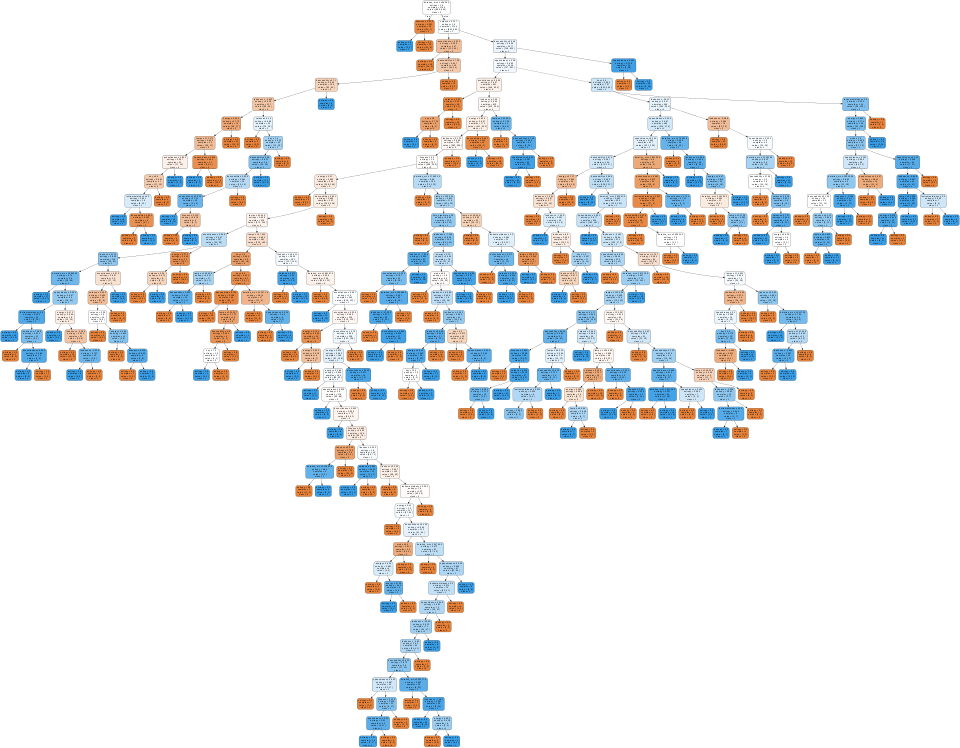

In [70]:
Tree_visulization(DTree_Clf)

In [71]:
y_pred_test = DTree_Clf.predict(X_test)

Test set     | balanced_accuracy is 88.00904977375565



<Figure size 1080x720 with 0 Axes>

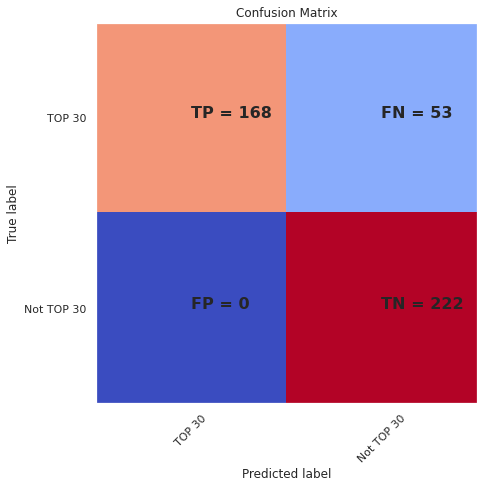


              precision    recall  f1-score   support

           0       1.00      0.76      0.86       221
           1       0.81      1.00      0.89       222

    accuracy                           0.88       443
   macro avg       0.90      0.88      0.88       443
weighted avg       0.90      0.88      0.88       443



In [72]:
print("Test set     | balanced_accuracy is", balanced_accuracy_score(y_test,y_pred_test)*100)
test_report = classification_report(y_test,y_pred_test)
test_cm = confusion_matrix(y_test,y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
r_probs = [0 for _ in range(len(y_test))]
DTree_probs = DTree_Clf.predict_proba(X_test)

In [75]:
DTree_probs = DTree_probs[:, 1]

In [76]:
r_auc = roc_auc_score(y_test, r_probs)
DTree_auc = roc_auc_score(y_test, DTree_probs)

In [77]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"Decision Tree: AUC = {DTree_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUC = 88.182%


In [78]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
DTree_fpr, DTree_tpr, _ = roc_curve(y_test, DTree_probs)

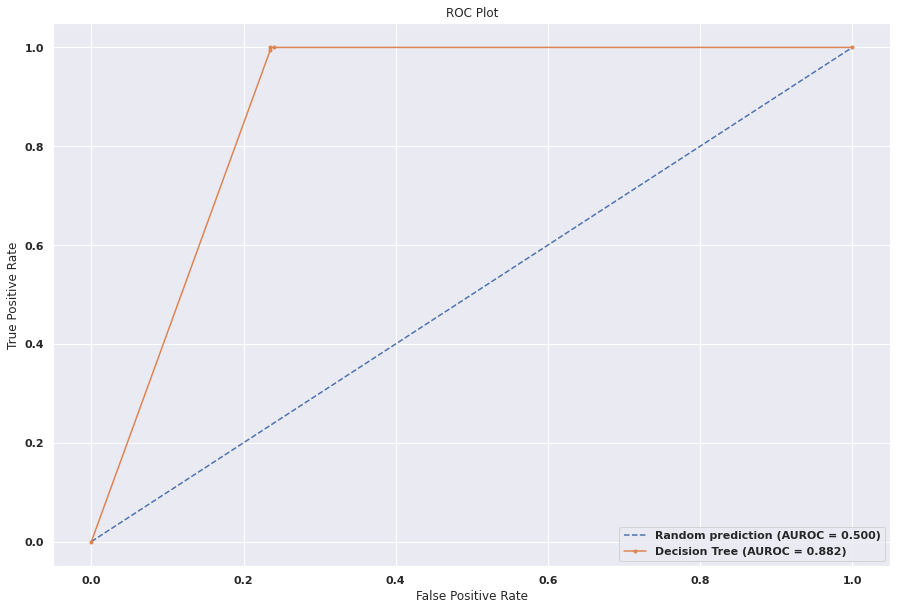

In [79]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(DTree_fpr, DTree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % DTree_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### NAIVE BAYES

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
NB_y_pred_train = gnb.predict(X_train)
NB_y_pred_test = gnb.predict(X_test)

In [83]:
test_bl_acc = balanced_accuracy_score(y_test,NB_y_pred_test)*100

Test set | Balance Accuracy is 55.28616852146264



<Figure size 1080x720 with 0 Axes>

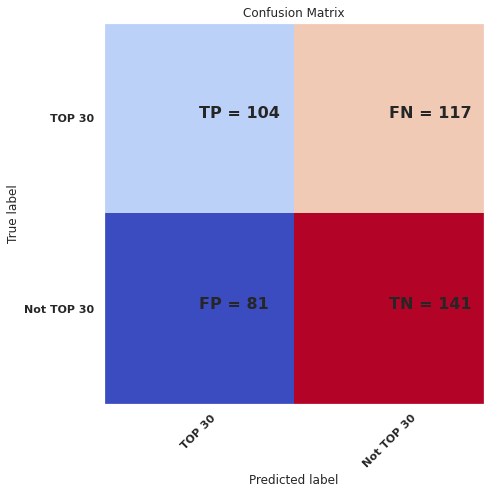


              precision    recall  f1-score   support

           0       0.56      0.47      0.51       221
           1       0.55      0.64      0.59       222

    accuracy                           0.55       443
   macro avg       0.55      0.55      0.55       443
weighted avg       0.55      0.55      0.55       443



In [84]:
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,NB_y_pred_test)
test_cm = confusion_matrix(y_test,NB_y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [85]:
r_probs = [0 for _ in range(len(y_test))]
gnb_probs = gnb.predict_proba(X_test)

In [86]:
gnb_probs = gnb_probs[:, 1]

In [87]:
r_auc = roc_auc_score(y_test, r_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)

In [88]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"Naive Bayes: AUC = {gnb_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
Naive Bayes: AUC = 58.660%


In [89]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)

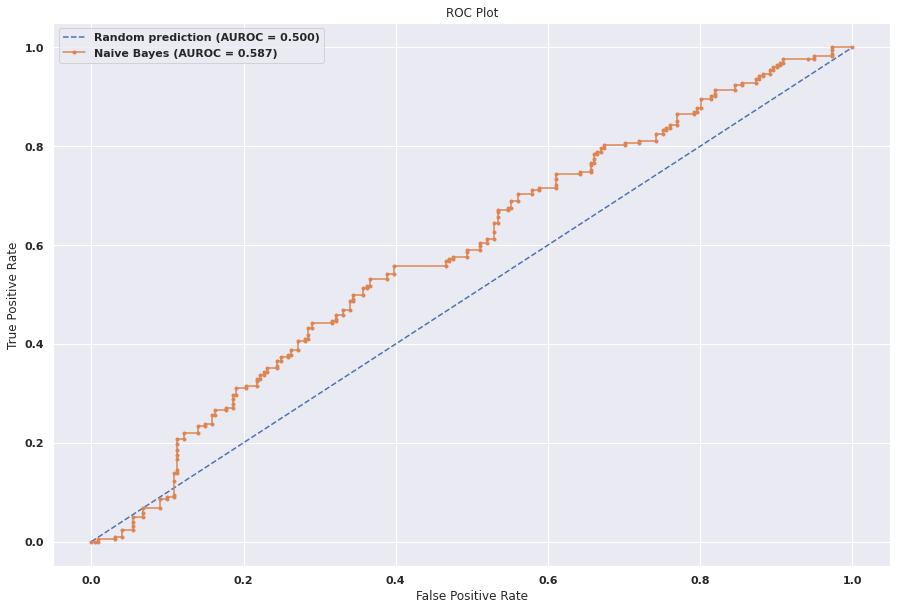

In [90]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % gnb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

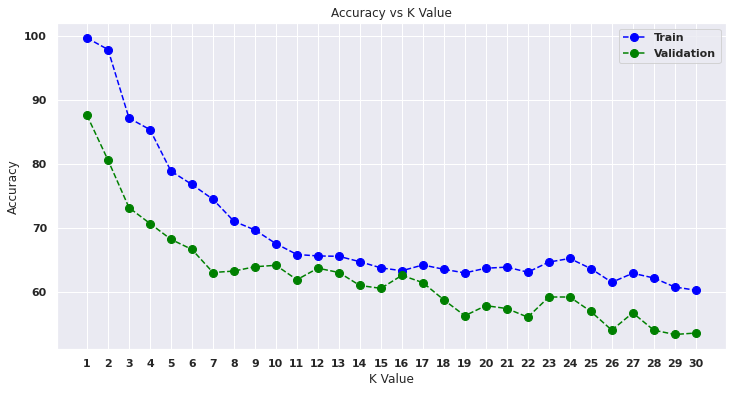

In [92]:
K_start = 1
K_end = 30
acc_tr = []
acc_te = []
for i in range(K_start, K_end+1):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scal, y_train)
    pred_i_tr = knn.predict(X_train_scal)
    pred_i_te = knn.predict(X_test_scal)
    acc_tr.append(accuracy_score(y_train,pred_i_tr)*100)
    acc_te.append(accuracy_score(y_test,pred_i_te)*100)
    
### Plot 
plt.figure(figsize=(12, 6))
plt.plot(range(K_start, K_end+1), acc_tr, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=8,label="Train")
plt.plot(range(K_start, K_end+1), acc_te, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=8,label="Validation")
plt.legend()
plt.xticks(np.arange(K_start, K_end+1, 1))
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')
plt.show()

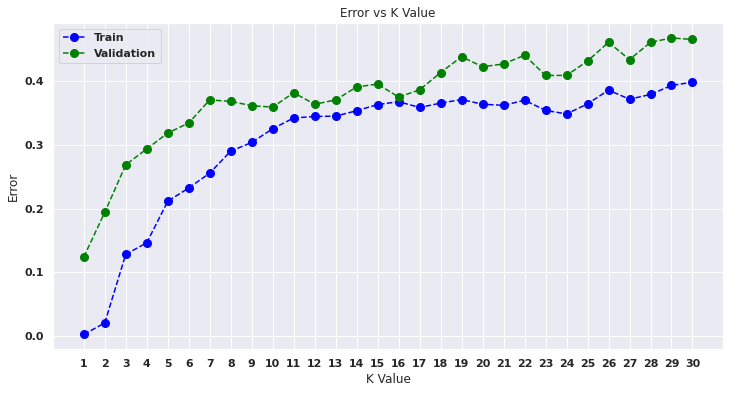

In [93]:
K_start = 1
K_end = 30
err_tr = []
err_te = []
for i in range(K_start, K_end+1):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scal, y_train)
    pred_i_tr = knn.predict(X_train_scal)
    pred_i_te = knn.predict(X_test_scal)
    err_tr.append(np.mean(pred_i_tr != y_train))
    err_te.append(np.mean(pred_i_te != y_test))
    
### Plot 
plt.figure(figsize=(12, 6))
plt.plot(range(K_start, K_end+1), err_tr, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=8,label="Train")
plt.plot(range(K_start, K_end+1), err_te, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=8,label="Validation")
plt.legend()
plt.xticks(np.arange(K_start, K_end+1, 1))
plt.title('Error vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Error')
plt.show()

In [94]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train_scal, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [95]:
Knn_y_pred_test =  neigh.predict(X_test_scal)

Test set | Balance Accuracy is 70.64530593942358



<Figure size 1080x720 with 0 Axes>

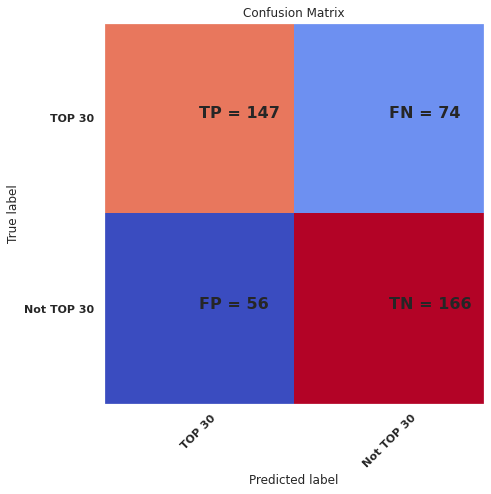


              precision    recall  f1-score   support

           0       0.72      0.67      0.69       221
           1       0.69      0.75      0.72       222

    accuracy                           0.71       443
   macro avg       0.71      0.71      0.71       443
weighted avg       0.71      0.71      0.71       443



In [96]:
test_bl_acc = balanced_accuracy_score(y_test,Knn_y_pred_test)*100
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,Knn_y_pred_test)
test_cm = confusion_matrix(y_test,Knn_y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [97]:
r_probs = [0 for _ in range(len(y_test))]
neigh_probs = neigh.predict_proba(X_test_scal)

In [98]:
neigh_probs = neigh_probs[:, 1]

In [99]:
r_auc = roc_auc_score(y_test, r_probs)
neigh_auc = roc_auc_score(y_test, neigh_probs)

In [100]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"KNN: AUC = {neigh_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
KNN: AUC = 77.824%


In [101]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
neigh_fpr, neigh_tpr, _ = roc_curve(y_test, neigh_probs)

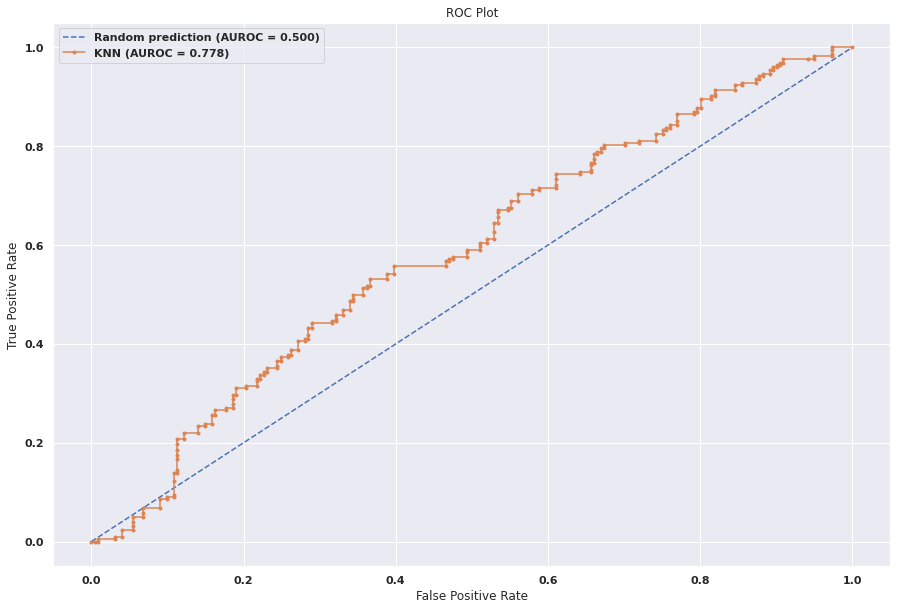

In [102]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='KNN (AUROC = %0.3f)' % neigh_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### BAGGING TREE

In [103]:
from sklearn.ensemble import BaggingClassifier

In [104]:
tree1 = DecisionTreeClassifier()

bagging_tree = BaggingClassifier(base_estimator=tree1,
                                 n_estimators=1000,
                                 max_samples=1.0)

bagging_tree = bagging_tree.fit(X_train, y_train) 

In [105]:
bagging_y_pred_test  = bagging_tree.predict(X_test)

In [106]:
test_bl_acc = balanced_accuracy_score(y_test,bagging_y_pred_test)*100

Test set | Balance Accuracy is 94.12274265215441



<Figure size 1080x720 with 0 Axes>

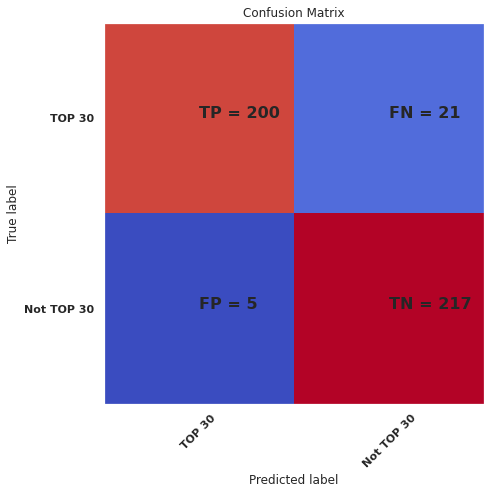


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       221
           1       0.91      0.98      0.94       222

    accuracy                           0.94       443
   macro avg       0.94      0.94      0.94       443
weighted avg       0.94      0.94      0.94       443



In [107]:
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,bagging_y_pred_test)
test_cm = confusion_matrix(y_test,bagging_y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [108]:
r_probs = [0 for _ in range(len(y_test))]
bagging_tree_probs = bagging_tree.predict_proba(X_test)

In [109]:
bagging_tree_probs = bagging_tree_probs[:, 1]

In [110]:
r_auc = roc_auc_score(y_test, r_probs)
bagging_tree_auc = roc_auc_score(y_test, bagging_tree_probs)

In [111]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"Bagging Tree: AUC = {bagging_tree_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
Bagging Tree: AUC = 99.147%


In [112]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
bagging_tree_fpr, bagging_tree_tpr, _ = roc_curve(y_test, bagging_tree_probs)

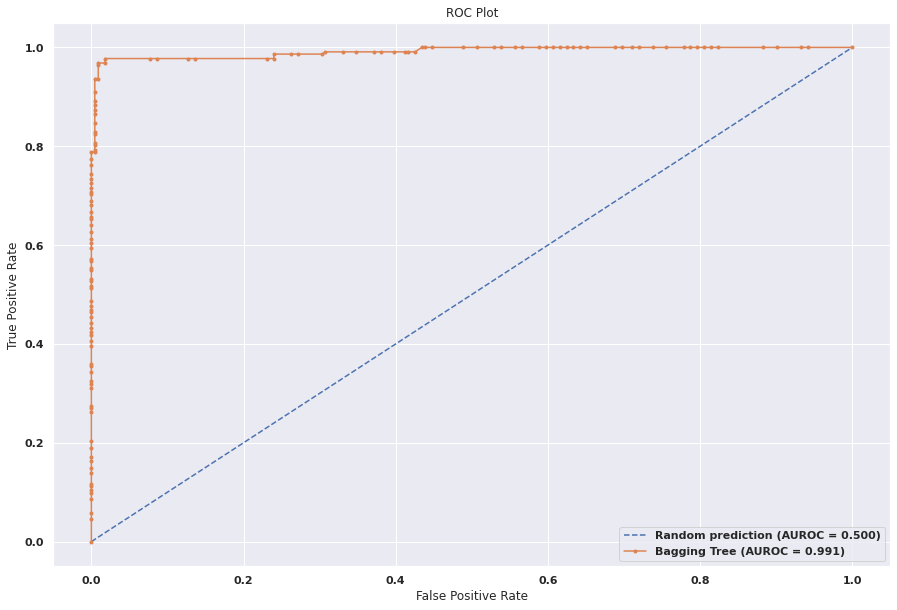

In [113]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(bagging_tree_fpr, bagging_tree_tpr, marker='.', label='Bagging Tree (AUROC = %0.3f)' % bagging_tree_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### BOOSTING TREE

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
Tree = DecisionTreeClassifier()
boosting = AdaBoostClassifier(base_estimator=Tree,n_estimators=500)
boosting = boosting.fit(X_train, y_train)

In [116]:
boosting_y_pred_test  = boosting.predict(X_test)

In [117]:
test_bl_acc = balanced_accuracy_score(y_test,boosting_y_pred_test)*100

Test set | Balance Accuracy is 90.95532183767479



<Figure size 1080x720 with 0 Axes>

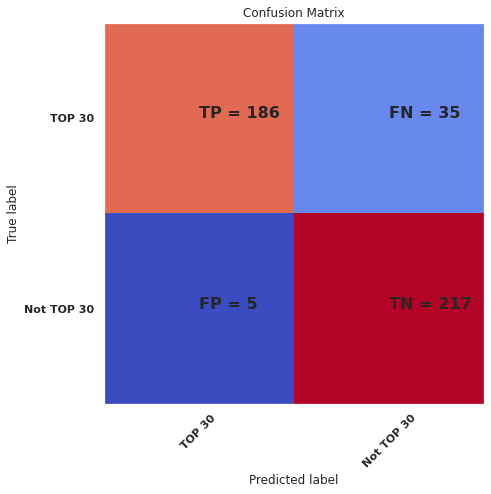


              precision    recall  f1-score   support

           0       0.97      0.84      0.90       221
           1       0.86      0.98      0.92       222

    accuracy                           0.91       443
   macro avg       0.92      0.91      0.91       443
weighted avg       0.92      0.91      0.91       443



In [118]:
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,boosting_y_pred_test)
test_cm = confusion_matrix(y_test,boosting_y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [119]:
r_probs = [0 for _ in range(len(y_test))]
boosting_probs = boosting.predict_proba(X_test)

In [120]:
boosting_probs = boosting_probs[:, 1]

In [121]:
r_auc = roc_auc_score(y_test, r_probs)
boosting_auc = roc_auc_score(y_test, boosting_probs)

In [122]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"Boosting: AUC = {boosting_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
Boosting: AUC = 95.094%


In [123]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
boosting_tree_fpr, boosting_tree_tpr, _ = roc_curve(y_test, boosting_probs)

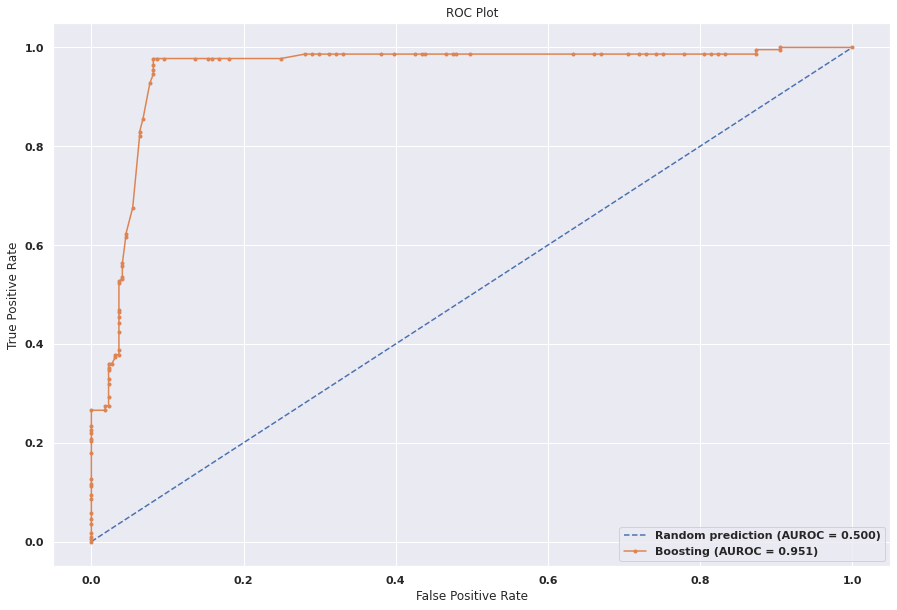

In [124]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(boosting_tree_fpr, boosting_tree_tpr, marker='.', label='Boosting (AUROC = %0.3f)' % boosting_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### RANDOM FOREST

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf = RandomForestClassifier(n_estimators= 500, criterion= 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rf_y_pred_test =  rf.predict(X_test)

Test set | Balance Accuracy is 95.70645305939424



<Figure size 1080x720 with 0 Axes>

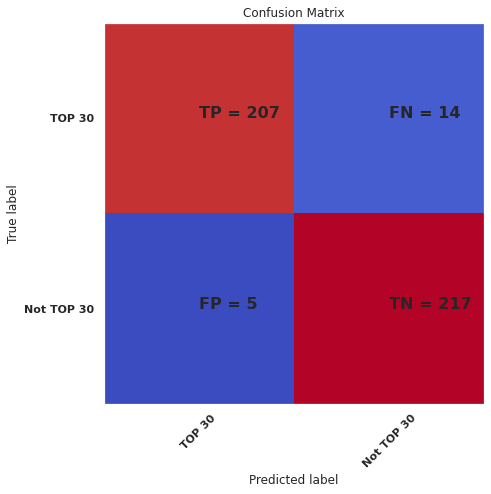


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       221
           1       0.94      0.98      0.96       222

    accuracy                           0.96       443
   macro avg       0.96      0.96      0.96       443
weighted avg       0.96      0.96      0.96       443



In [128]:
test_bl_acc = balanced_accuracy_score(y_test,rf_y_pred_test)*100
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,rf_y_pred_test)
test_cm = confusion_matrix(y_test,rf_y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [129]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: acousticness         Importance: 0.102
Variable: duration_ms          Importance: 0.102
Variable: valence              Importance: 0.102
Variable: loudness             Importance: 0.101
Variable: speechiness          Importance: 0.097
Variable: liveness             Importance: 0.096
Variable: tempo                Importance: 0.095
Variable: energy               Importance: 0.091
Variable: danceability         Importance: 0.09
Variable: key                  Importance: 0.056
Variable: instrumentalness     Importance: 0.05
Variable: mode                 Importance: 0.013
Variable: time_signature       Importance: 0.004


In [130]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

In [131]:
rf_probs = rf_probs[:, 1]

In [132]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [133]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"Random Forest: AUC = {rf_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUC = 99.265%


In [134]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

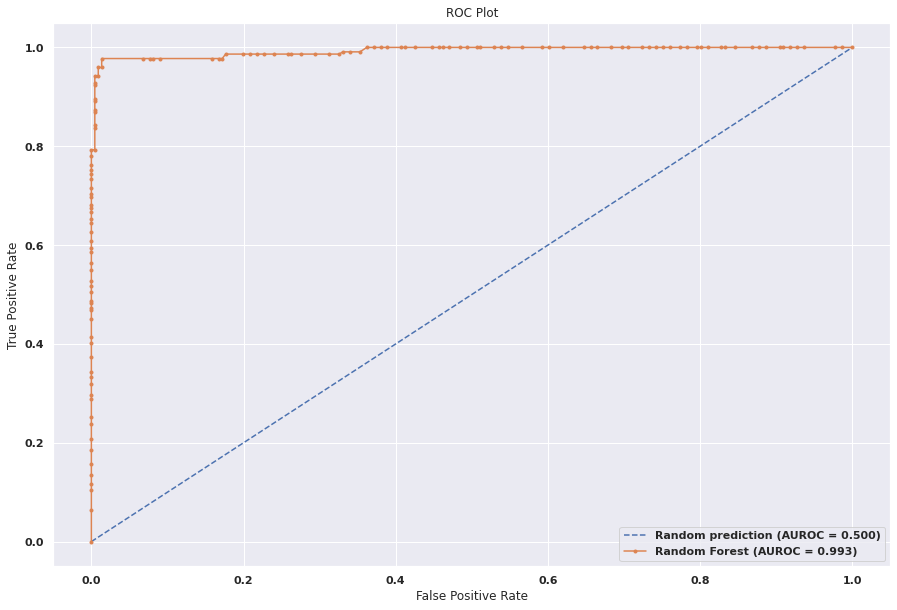

In [135]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### XG BOOST

In [136]:
from  xgboost import XGBClassifier, plot_importance

In [137]:
xgb = XGBClassifier(gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [138]:
xgb_y_pred_test = xgb.predict(X_test)

Test set | Balance Accuracy is 84.87118340059516



<Figure size 1080x720 with 0 Axes>

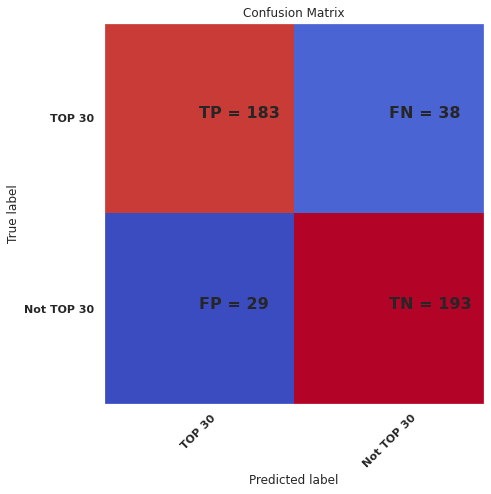


              precision    recall  f1-score   support

           0       0.86      0.83      0.85       221
           1       0.84      0.87      0.85       222

    accuracy                           0.85       443
   macro avg       0.85      0.85      0.85       443
weighted avg       0.85      0.85      0.85       443



In [139]:
test_bl_acc = balanced_accuracy_score(y_test,xgb_y_pred_test)*100
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,xgb_y_pred_test)
test_cm = confusion_matrix(y_test,xgb_y_pred_test)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [140]:
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {:.2f}'.format(*pair)) for pair in feature_importances];

Variable: time_signature       Importance: 0.10
Variable: liveness             Importance: 0.08
Variable: acousticness         Importance: 0.08
Variable: instrumentalness     Importance: 0.08
Variable: duration_ms          Importance: 0.08
Variable: loudness             Importance: 0.08
Variable: mode                 Importance: 0.08
Variable: energy               Importance: 0.07
Variable: tempo                Importance: 0.07
Variable: speechiness          Importance: 0.07
Variable: key                  Importance: 0.07
Variable: valence              Importance: 0.07
Variable: danceability         Importance: 0.06


In [141]:
r_probs = [0 for _ in range(len(y_test))]
xgb_probs = xgb.predict_proba(X_test)

In [142]:
xgb_probs = xgb_probs[:, 1]

In [143]:
r_auc = roc_auc_score(y_test, r_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [144]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"XG Boost: AUC = {xgb_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
XG Boost: AUC = 93.512%


In [145]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

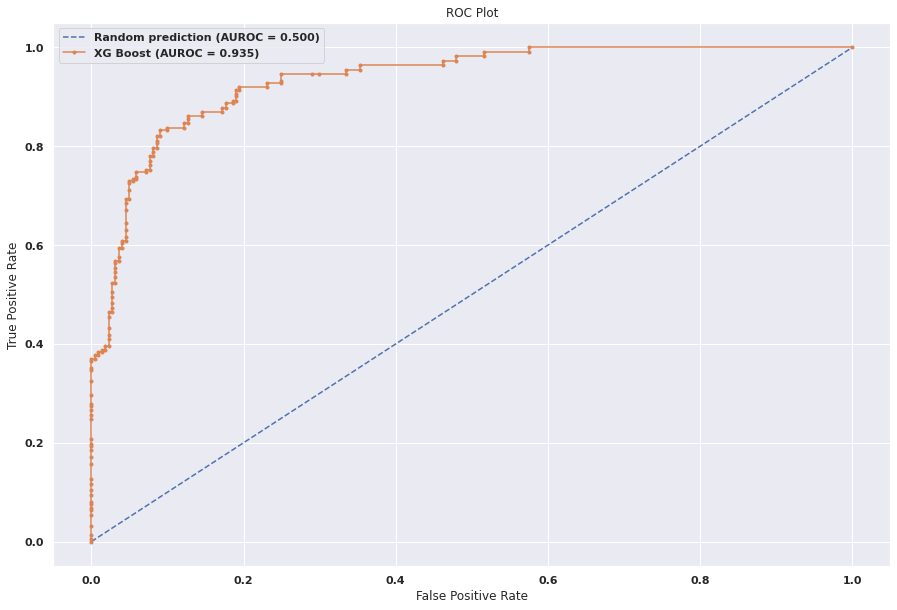

In [146]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XG Boost (AUROC = %0.3f)' % xgb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## NN

In [147]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import tensorflow.keras.metrics as keras_metrics
from keras.layers import Convolution2D, MaxPooling2D

### Specify Architecture


In [148]:
y_train_nn = y_train
y_val_nn = y_test

X_train_nn = X_train_scal
X_val_nn = X_test_scal

input_shapes = X_train_nn.shape[1]
output_dims = len(y_train_nn.unique())

first_layer_node =200
second_layer_node = 200
third_layer_node = 200

activation_f = 'relu'
activation_output = 'softmax'

In [149]:
model = Sequential()


model.add(Dense(first_layer_node, activation=activation_f, input_shape=(input_shapes,)))
#model.add(Dropout(rate=0.25))

model.add(Dense(second_layer_node, activation=activation_f))
#model.add(Dropout(rate=0.25))

model.add(Dense(third_layer_node, activation=activation_f))
model.add(Dropout(rate=0.25))


model.add(Dense(output_dims, activation=activation_output))

### Compile

In [150]:
optimizer = 'Adam'
loss_function = 'sparse_categorical_crossentropy'
eva_matrics = ['accuracy']

In [151]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=eva_matrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 83,602
Trainable params: 83,602
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [152]:
epochs = 15
batch_size = 10
nn = model.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn,y_val_nn), epochs = epochs, batch_size=batch_size, verbose=1)

Epoch 1/15
177/177 [==============================] - 2s 6ms/step - loss: 0.6961 - accuracy: 0.5407 - val_loss: 0.6670 - val_accuracy: 0.5914
Epoch 2/15
177/177 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.5898 - val_loss: 0.6521 - val_accuracy: 0.6095
Epoch 3/15
177/177 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6679 - val_loss: 0.6221 - val_accuracy: 0.6140
Epoch 4/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7093 - val_loss: 0.5918 - val_accuracy: 0.6817
Epoch 5/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7488 - val_loss: 0.5707 - val_accuracy: 0.7065
Epoch 6/15
177/177 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8081 - val_loss: 0.5770 - val_accuracy: 0.7020
Epoch 7/15
177/177 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8181 - val_loss: 0.5353 - val_accuracy: 0.7585
Epoch 

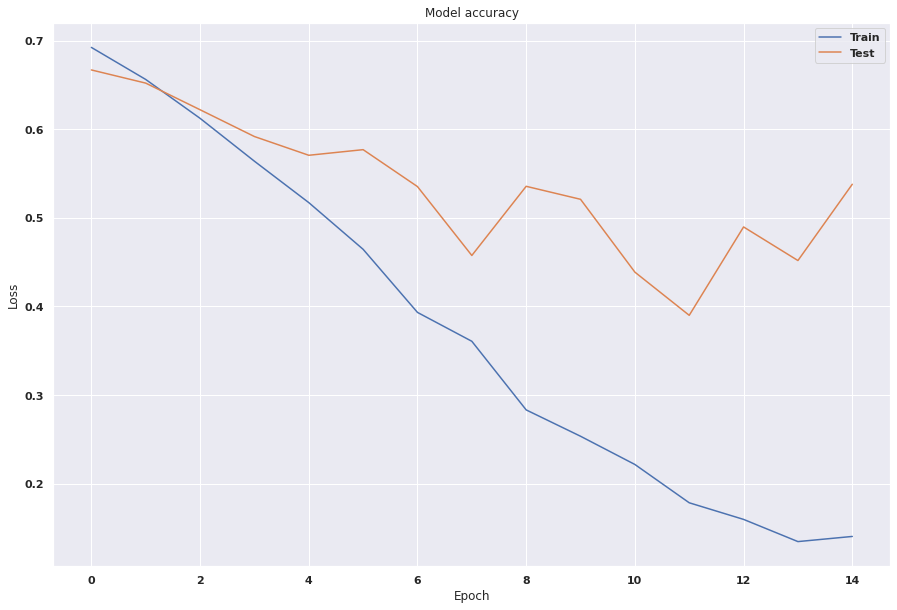

In [153]:
# Plot train vs test accuracy per epoch 
plt.figure()  

# Use the history metrics 
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss']) 


# Make it pretty 
plt.title('Model accuracy') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test']) 
plt.show()

In [154]:
nn_scal_pred = model.predict(X_test_scal)

In [155]:
nn_scal_pred

array([[8.44202586e-04, 9.99155760e-01],
       [9.01298523e-01, 9.87015218e-02],
       [9.99968410e-01, 3.15976213e-05],
       [5.89566290e-01, 4.10433710e-01],
       [4.20882292e-02, 9.57911789e-01],
       [9.94468212e-01, 5.53179299e-03],
       [8.90859286e-04, 9.99109089e-01],
       [1.66013371e-03, 9.98339891e-01],
       [9.99797046e-01, 2.02972849e-04],
       [7.79861957e-02, 9.22013819e-01],
       [9.95706856e-01, 4.29314235e-03],
       [5.62514603e-01, 4.37485367e-01],
       [6.86515309e-03, 9.93134856e-01],
       [5.51896393e-02, 9.44810331e-01],
       [1.97336320e-02, 9.80266392e-01],
       [9.99838352e-01, 1.61586460e-04],
       [6.63356506e-04, 9.99336660e-01],
       [4.48798627e-01, 5.51201344e-01],
       [1.04691349e-02, 9.89530802e-01],
       [1.59400366e-02, 9.84059930e-01],
       [2.67960923e-03, 9.97320354e-01],
       [2.63171154e-03, 9.97368276e-01],
       [5.40563226e-01, 4.59436774e-01],
       [9.99317288e-01, 6.82717597e-04],
       [2.731846

In [156]:
import numpy as np

pred_class = np.argmax(nn_scal_pred, axis=-1) 

In [157]:
pred_class[:5]

array([1, 0, 0, 0, 1])

### Evaluation

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, precision_score, recall_score

In [159]:
y_test[:5]

477     1
940     0
546     0
1053    0
1944    1
dtype: int64

In [160]:
test_acc = accuracy_score(y_test,pred_class)*100
test_bl_acc = balanced_accuracy_score(y_test,pred_class)*100

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)

Test set | Accuracy is 81.48984198645599
Test set | Balance Accuracy is 81.45509763156822


##MODEL BALANCE ACCURACY COMPARISON AND AUC SCORE

In [161]:
DT_y_pred_test = DTree_Clf.predict(X_test)
NB_y_pred_test = gnb.predict(X_test)
Knn_y_pred_test =  neigh.predict(X_test_scal)
bagging_y_pred_test  = bagging_tree.predict(X_test)
boosting_y_pred_test  = boosting.predict(X_test)
rf_y_pred_test =  rf.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)

model_name = ['Decision_tree', 'Naive bayes', 'K-NN', 'Bagging_tree', 'Boosting_tree', 'Random_forest', 'Xgboost']
pred = [DT_y_pred_test, NB_y_pred_test, Knn_y_pred_test, bagging_y_pred_test, boosting_y_pred_test, rf_y_pred_test,
        xgb_y_pred_test]

In [162]:
B_Acc = lambda pred : balanced_accuracy_score(y_test,pred)*100
balanced_accuracy = list(map(B_Acc, pred))
balanced_accuracy = zip(model_name, balanced_accuracy)
balanced_accuracy = sorted(balanced_accuracy, key = lambda x: x[1], reverse = True)

[print('Model: {:20} balanced_accuracy: {:.2f}'.format(*pair)) for pair in balanced_accuracy];

Model: Random_forest        balanced_accuracy: 95.71
Model: Bagging_tree         balanced_accuracy: 94.12
Model: Boosting_tree        balanced_accuracy: 90.96
Model: Decision_tree        balanced_accuracy: 88.01
Model: Xgboost              balanced_accuracy: 84.87
Model: K-NN                 balanced_accuracy: 70.65
Model: Naive bayes          balanced_accuracy: 55.29


In [163]:
DT_probs = DTree_Clf.predict_proba(X_test)
NB_probs = gnb.predict_proba(X_test)
Knn_probs =  neigh.predict_proba(X_test_scal)
bagging_probs  = bagging_tree.predict_proba(X_test)
boosting_probs  = boosting.predict_proba(X_test)
rf_probs =  rf.predict_proba(X_test)
xgb_probs = xgb.predict_proba(X_test)

DT_probs = DT_probs[:, 1]
rf_probs = rf_probs[:, 1]
boosting_probs = boosting_probs[:, 1]
bagging_probs = bagging_probs[:, 1]
Knn_probs = Knn_probs[:, 1]
NB_probs = NB_probs[:, 1]
xgb_probs = xgb_probs[:, 1]


model_name = ['Decision_tree', 'Naive bayes', 'K-NN', 'Bagging_tree', 'Boosting_tree', 'Random_forest', 'Xgboost']
AUC = [DT_probs, NB_probs, Knn_probs, bagging_probs, boosting_probs, rf_probs,
        xgb_probs]

In [164]:
AUC_score = lambda AUC : roc_auc_score(y_test, AUC)*100
Model_AUC = list(map(AUC_score, AUC))
Model_AUC = zip(model_name, Model_AUC)
Model_AUC = sorted(Model_AUC, key = lambda x: x[1], reverse = True)

[print('Model: {:20} Model_AUC: {:.2f}'.format(*pair)) for pair in Model_AUC];

Model: Random_forest        Model_AUC: 99.27
Model: Bagging_tree         Model_AUC: 99.15
Model: Boosting_tree        Model_AUC: 95.09
Model: Xgboost              Model_AUC: 93.51
Model: Decision_tree        Model_AUC: 88.18
Model: K-NN                 Model_AUC: 77.82
Model: Naive bayes          Model_AUC: 58.66


## FINAL

In [165]:
!pip install ipywidgets

In [166]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import re
from urllib.error import HTTPError


In [167]:
def get_feature(track_id):  
  features_list = []
  audio_features = sp.audio_features(track_id)

  for features in audio_features:
      features_list.append([features['energy'], features['liveness'],
                          features['tempo'], features['speechiness'],
                          features['acousticness'], features['instrumentalness'],
                          features['time_signature'], features['danceability'],
                          features['key'], features['duration_ms'],
                          features['loudness'], features['valence'],
                          features['mode'], features['type'],
                          features['uri']])
      
  df_features = pd.DataFrame(features_list, columns=['energy', 'liveness',
                                              'tempo', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'time_signature', 'danceability',
                                              'key', 'duration_ms', 'loudness',
                                              'valence', 'mode', 'type', 'uri'])
                                              
  
  return df_features

In [168]:
@interact(track_name = 'วันที่ฉันไม่อยู่')
def search_track(track_name):
  audio_features = []
  track = sp.search(q=track_name ,type='track')
  try:
    album_name = track['tracks']['items'][0]['album']['name']
    name = track['tracks']['items'][0]['name']
    release_date = track['tracks']['items'][0]['album']['release_date']
    artists = track['tracks']['items'][0]['album']['artists'][0]['name']
    track_id = track['tracks']['items'][0]['external_urls']['spotify'][31:]
    popularity  = track['tracks']['items'][0]['popularity']
    print("-"*15)
    print(f"album name : {album_name}")
    print(f"track name : {name}")
    print(f"artists : {artists}")
    print(f"release date : {release_date}")
    print(f"popularity : {popularity}")
    print(' ')
    print(f"id : {track_id}")
    print("-"*15)

    df_features = get_feature(track_id)
    X = df_features.drop(['type', 'uri'], axis = 1)
    X_scal = scaler.transform(X)  
    X_scal = pd.DataFrame(data=X_scal, index=X.index, columns=X.columns)


    DT_y_pred_test = DTree_Clf.predict(X)
    NB_y_pred_test = gnb.predict(X)
    Knn_y_pred_test =  neigh.predict(X_scal)
    bagging_y_pred_test  = bagging_tree.predict(X)
    boosting_y_pred_test  = boosting.predict(X)
    rf_y_pred_test =  rf.predict(X)
    xgb_y_pred_test = xgb.predict(X)

    model_name = ['Xgboost', 'Random_forest', 'Bagging_tree', 'K-NN', 'Decision_tree', 'Boosting_tree', 'Naive bayes']
    pred = [xgb_y_pred_test, rf_y_pred_test, bagging_y_pred_test, Knn_y_pred_test, DT_y_pred_test, boosting_y_pred_test,  NB_y_pred_test]
    target_class = zip(model_name, pred)
    
    print(' ')
    print("-"*15)
    print('PREDICT')
    [print('Model: {:20} Target Class: {:}'.format(*pair)) for pair in target_class];
    print("-"*15)
    print(' ')
    print('TOP 30') if sum(pred) >= 4 else print('NOT TOP 30')
    print('May be on TOP 30 Chart') if sum(pred) >= 3 else print("May be not on TOP 30 Chart")
  except IndexError:
    print(f"No results found for '{track_name}'")
  

interactive(children=(Text(value='วันที่ฉันไม่อยู่', description='track_name'), Output()), _dom_classes=('widg…

In [169]:
! pip install mlxtend

## PLAYGROUND
Ensemble (combine multiple model)
- Decision Tree
- Bagging
- Boosting
- XGBoost
- Random Forest

In [170]:
from mlxtend.classifier import EnsembleVoteClassifier

In [171]:
ensemble = EnsembleVoteClassifier(clfs = [DTree_Clf, bagging_tree, boosting, xgb, rf], voting = 'soft')

In [172]:
ensemble.fit(X_train, y_train)

EnsembleVoteClassifier(clfs=[DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=38,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
                                                   

In [173]:
y_ensemble_pred = ensemble.predict(X_test)

Test set | Balance Accuracy is 92.08348620113325



<Figure size 1080x720 with 0 Axes>

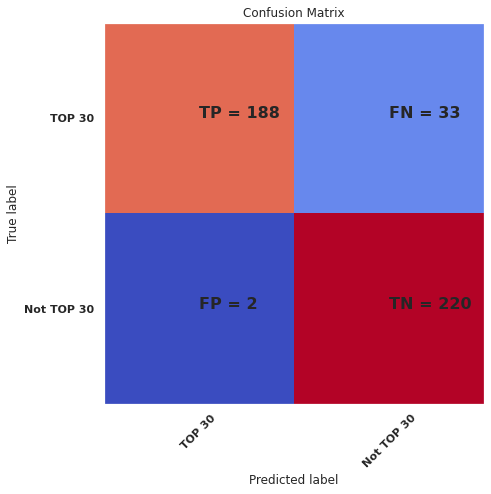


              precision    recall  f1-score   support

           0       0.99      0.85      0.91       221
           1       0.87      0.99      0.93       222

    accuracy                           0.92       443
   macro avg       0.93      0.92      0.92       443
weighted avg       0.93      0.92      0.92       443



In [174]:
test_bl_acc = balanced_accuracy_score(y_test,y_ensemble_pred)*100
print("Test set | Balance Accuracy is", test_bl_acc)
test_report = classification_report(y_test,y_ensemble_pred)
test_cm = confusion_matrix(y_test,y_ensemble_pred)
print("")
cm_plot(test_cm)
print("")
print(test_report)

In [175]:
r_probs = [0 for _ in range(len(y_test))]
ensemble_probs = ensemble.predict_proba(X_test)

In [176]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print(f"Ensemble: AUC = {xgb_auc*100:.3f}%")

Random (chance) Prediction: AUROC = 0.500
Ensemble: AUC = 93.512%
